In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
from keras import layers, Sequential

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\ysaru\\Desktop\\Datasets\\breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(['id'], axis=1, inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 31)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [9]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, stratify=y, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train.shape

(426, 30)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(30,), activation='relu', kernel_initializer='ones', bias_initializer='zeros'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [14]:
model.fit(X_train,y_train, epochs=20, validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 4s 58ms/step - loss: 0.6694 - accuracy: 0.8912 - val_loss: 0.5138 - val_accuracy: 0.9535
Epoch 2/20
11/11 [==============================] - 0s 8ms/step - loss: 0.4995 - accuracy: 0.9206 - val_loss: 0.4747 - val_accuracy: 0.9651
Epoch 3/20
11/11 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.9206 - val_loss: 0.4636 - val_accuracy: 0.9651
Epoch 4/20
11/11 [==============================] - 0s 10ms/step - loss: 0.4562 - accuracy: 0.9294 - val_loss: 0.4451 - val_accuracy: 0.9884
Epoch 5/20
11/11 [==============================] - 0s 17ms/step - loss: 0.4467 - accuracy: 0.9353 - val_loss: 0.4361 - val_accuracy: 0.9767
Epoch 6/20
11/11 [==============================] - 0s 9ms/step - loss: 0.4416 - accuracy: 0.9324 - val_loss: 0.4292 - val_accuracy: 0.9884
Epoch 7/20
11/11 [==============================] - 0s 8ms/step - loss: 0.4360 - accuracy: 0.9353 - val_loss: 0.4241 - val_accuracy: 0.9884
Epoch 8/20
11/11 

In [15]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 7ms/step - loss: 0.3780 - accuracy: 0.9510


[0.37803155183792114, 0.9510489702224731]

In [16]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [17]:
y_pred[:5]

array([[0.9991929 ],
       [0.44875756],
       [0.44875756],
       [0.44875756],
       [0.71284676]], dtype=float32)

In [18]:
y_pred1 = y_pred > 0.5

In [19]:
y_pred1[:5]

array([[ True],
       [False],
       [False],
       [False],
       [ True]])

In [20]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

print(accuracy_score(y_test,y_pred1))
print()
print(f1_score(y_test,y_pred1))

0.951048951048951

0.9345794392523364


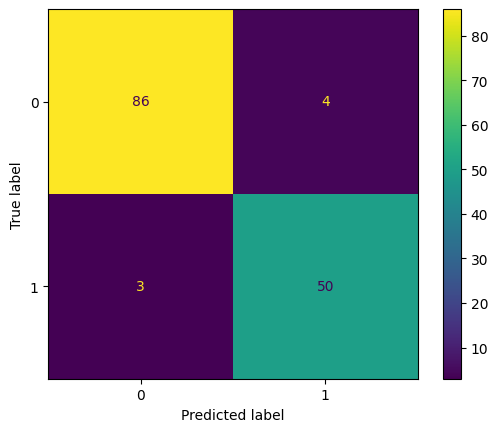

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)

In [22]:
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Dense(
        units = hp.Int('dense_1_layer', min_value=32, max_value=128, step=16),
        activation='relu',
        input_shape=(30,)
        ),
        keras.layers.Dense(1, activation='sigmoid')        
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    return model

In [23]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [24]:
tuner_search = RandomSearch(build_model,
                            objective='val_accuracy',
                            max_trials=5, directory='output',
                            project_name='Breast Cancer')

INFO:tensorflow:Reloading Tuner from output\Breast Cancer\tuner0.json


In [25]:
tuner_search.search(X_train, y_train, epochs=3, validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [26]:
model = tuner_search.get_best_models(num_models=1)[0]

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2049 (8.00 KB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, epochs=20, validation_split=0.2, initial_epoch=3)

Epoch 4/20
11/11 [==============================] - 2s 41ms/step - loss: 0.1234 - accuracy: 0.9735 - val_loss: 0.0229 - val_accuracy: 0.9884
Epoch 5/20
11/11 [==============================] - 0s 10ms/step - loss: 0.0853 - accuracy: 0.9765 - val_loss: 0.2590 - val_accuracy: 0.9767
Epoch 6/20
11/11 [==============================] - 0s 10ms/step - loss: 0.1042 - accuracy: 0.9794 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/20
11/11 [==============================] - 0s 8ms/step - loss: 0.1742 - accuracy: 0.9882 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 8/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0763 - accuracy: 0.9882 - val_loss: 0.0622 - val_accuracy: 0.9884
Epoch 9/20
11/11 [==============================] - 0s 9ms/step - loss: 0.1117 - accuracy: 0.9647 - val_loss: 0.0559 - val_accuracy: 0.9884
Epoch 10/20
11/11 [==============================] - 0s 8ms/step - loss: 0.0209 - accuracy: 0.9971 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 11/20
11/1

In [29]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.9580


[0.2902892231941223, 0.9580419659614563]

In [30]:
y_pred_tune = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [31]:
y_pred1_tune = y_pred_tune > 0.5

In [32]:
print(accuracy_score(y_test, y_pred1_tune))
print()
print(f1_score(y_test, y_pred1_tune))

0.958041958041958

0.9454545454545454


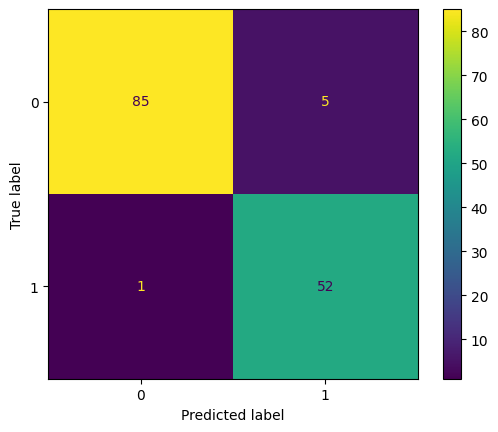

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1_tune)